2024-11-09 02:50:14,796 - INFO - Simulating from day 1/90 (2024-03-21)
2024-11-09 02:50:14,800 - INFO - Simulating from day 2/90 (2024-03-22)
2024-11-09 02:50:14,805 - INFO - Simulating from day 3/90 (2024-03-25)
2024-11-09 02:50:14,808 - INFO - Simulating from day 4/90 (2024-03-26)
2024-11-09 02:50:14,813 - INFO - Simulating from day 5/90 (2024-03-27)
2024-11-09 02:50:14,817 - INFO - Simulating from day 6/90 (2024-03-28)
2024-11-09 02:50:14,821 - INFO - Simulating from day 7/90 (2024-04-02)
2024-11-09 02:50:14,825 - INFO - Simulating from day 8/90 (2024-04-03)
2024-11-09 02:50:14,830 - INFO - Simulating from day 9/90 (2024-04-04)
2024-11-09 02:50:14,834 - INFO - Simulating from day 10/90 (2024-04-05)
2024-11-09 02:50:14,837 - INFO - Simulating from day 11/90 (2024-04-08)
2024-11-09 02:50:14,841 - INFO - Simulating from day 12/90 (2024-04-09)
2024-11-09 02:50:14,846 - INFO - Simulating from day 13/90 (2024-04-10)
2024-11-09 02:50:14,849 - INFO - Simulating from day 14/90 (2024-04-11)
2

[878.5380370265586, 869.9443195339485, 864.8167370103799, 893.6501087518689, 935.8019644646641, 887.5019362776251, 902.5902033634311, 898.6998396266132, 875.511947886, 834.974246071732, 925.9432063043247, 929.2066310372586, 923.0059135947747, 876.857013380245, 879.1115168503175, 809.8465806089743, 887.1382782308144, 918.2433294058095, 923.647234773304, 853.6295425499414, 866.7655033695653, 827.7444105134633, 905.6535528498725, 871.9957990607376, 903.1942371783771, 835.9654409015524, 952.9876828940494, 898.9459648004151, 880.7355554664758, 876.059818442786, 905.6935308285713, 942.0668918631951, 899.1988766465392, 897.6264099175714, 912.7016431267126, 922.5978648239228, 927.8614437895178, 928.8776519094139, 903.678030945496, 960.8354371343972, 919.9611710091452, 960.4514583713262, 944.396083041633, 898.5861723433184, 934.2434476846381, 920.6959019871902, 886.6630455098236, 915.011639234432, 863.0848615572493, 906.3503890748618, 921.8020701510244, 912.6395738205817, 903.2530978886592, 886

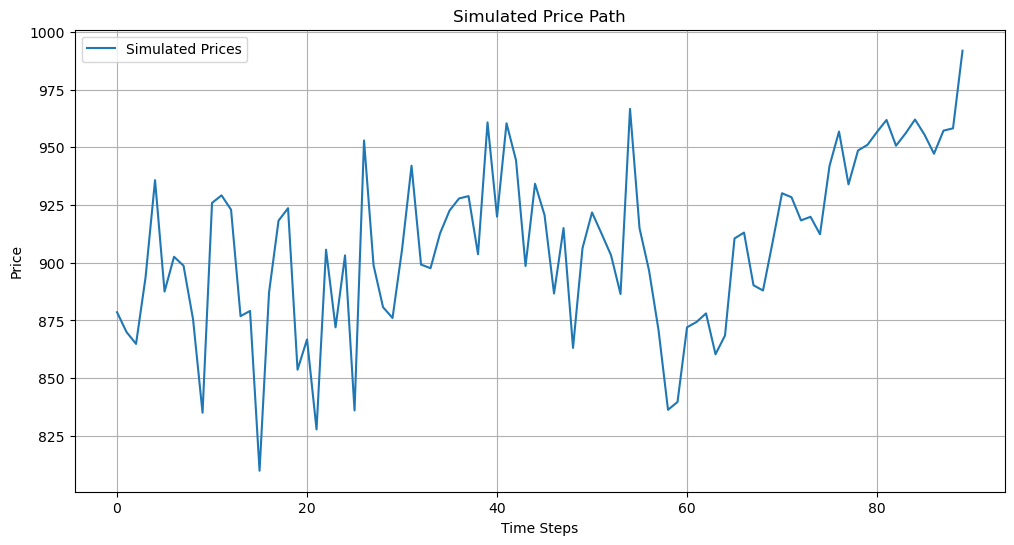

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import logging
import Dates as dates
import numpy as np
from dateutil.relativedelta import relativedelta

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define constants (replace these with actual values)
class Constants:
    initial_fixing_date = "2023-04-27"
    final_fixing_date = pd.to_datetime("2024-07-30")
    initialS1 = 524.60  # Initial price of Asset 1 (e.g., Lonza)
    initialS2 = 271.60  # Initial price of Asset 2 (e.g., Sika)
    barrierS1 = 329.76
    barrierS2 = 144.24
    V0_S1 = 0.01        # Initial variance of Asset 1
    V0_S2 = 0.195311        # Initial variance of Asset 2
    mu_S1 = 0.018        # Expected return of Asset 1
    mu_S2 = 0.018        # Expected return of Asset 2
    kappa_S1 = 4.483091      # Mean reversion rate of Asset 1
    kappa_S2 = 0.901516      # Mean reversion rate of Asset 2
    theta_S1 = 0.124813     # Long-term variance of Asset 1
    theta_S2 = 0.184639     # Long-term variance of Asset 2
    sigma_v_S1 = 1    # Volatility of variance of Asset 1
    sigma_v_S2 = 0.549895   # Volatility of variance of Asset 2
    rho_S1 = 0.772476       # Correlation between asset price and variance of Asset 1
    rho_S2 = -0.728402       # Correlation between asset price and variance of Asset 2
    rho_assets = np.array([[1.0, 0.4250732997428952], [0.4250732997428952, 1.0]])  # Correlation between assets

cs = Constants()


# Load actual price data for Lonza (Asset 1)
lonza_price_df = pd.read_csv('C:/Users/javie/MH4518/lonza_price_90.csv')
# Load actual price data for Sika (Asset 2)
sika_price_df = pd.read_csv('C:/Users/javie/MH4518/sika_price_90.csv')
# For Lonza
lonza_price_df['Date'] = pd.to_datetime(lonza_price_df['Date'],format = '%Y-%m-%d')
lonza_price_df.set_index('Date', inplace=True)
lonza_price_df.rename(columns={'Close': 'S1'}, inplace=True)
# For Sika
sika_price_df['Date'] = pd.to_datetime(sika_price_df['Date'],format = '%Y-%m-%d')
sika_price_df.set_index('Date', inplace=True)
sika_price_df.rename(columns={'Close': 'S2'}, inplace=True)
# Keep only the 'S1' column for Lonza and 'S2' column for Sika
lonza_price_df = lonza_price_df[['S1']]
sika_price_df = sika_price_df[['S2']]
# Combine the two DataFrames on the Date index
actual_prices_df = lonza_price_df.join(sika_price_df, how='inner')
# Combine the two DataFrames on the Date index
actual_prices_df = lonza_price_df.join(sika_price_df, how='inner')
last_90_days = lonza_price_df.index[-90:]
# Convert each element to a date object (list of dates)
last_90_days = pd.to_datetime(last_90_days)


num_simulations = 10
num_days = len(last_90_days)
num_assets = 2  # Two assets


# Initialize matrices to store the simulation results
simulated_prices_S1 = np.zeros((num_simulations, num_days))
simulated_prices_S2 = np.zeros((num_simulations, num_days))

# Heston model parameters
S0_original = [cs.initialS1, cs.initialS2]  # Initial prices
V0_original = [cs.V0_S1, cs.V0_S2]          # Initial variances
mu = [cs.mu_S1, cs.mu_S2]                   # Expected returns
kappa = [cs.kappa_S1, cs.kappa_S2]          # Mean reversion rates
theta = [cs.theta_S1, cs.theta_S2]          # Long-term variance levels
sigma_v = [cs.sigma_v_S1, cs.sigma_v_S2]    # Volatility of variance
rho = [cs.rho_S1, cs.rho_S2]                # Correlation between asset price and variance
rho_assets = cs.rho_assets                  # Correlation matrix between the two assets

dt = 1 / 252  # Daily time step

def simulate_heston_multidim(S0, V0, mu, kappa, theta, sigma_v, rho, rho_assets, N, dt, nsims):
    num_assets = len(S0)
    # Initialize arrays
    S = np.zeros((nsims, N, num_assets))
    V = np.zeros((nsims, N, num_assets))

    # Set initial values
    S[:, 0, :] = S0
    V[:, 0, :] = V0

    # Cholesky decomposition for price and volatilities
    corr_matrix = np.block([
        [rho_assets, np.zeros((num_assets, num_assets))],
        [np.zeros((num_assets, num_assets)), np.eye(num_assets)]
    ])
    L = np.linalg.cholesky(corr_matrix)

    for t in range(1, N):
        Z = np.random.normal(size=(2 * num_assets, nsims))
        dW = L @ Z * np.sqrt(dt)  # Shape: (2 * num_assets, nsims)

        for i in range(num_assets):
            dW_S_i = dW[i, :]
            dW_v_i = dW[num_assets + i, :]
            dW_v_i = rho[i] * dW_S_i + np.sqrt(1 - rho[i] ** 2) * dW_v_i

            V_prev = V[:, t - 1, i]
            V_sqrt = np.sqrt(np.maximum(V_prev, 0))
            V[:, t, i] = V_prev + kappa[i] * (theta[i] - V_prev) * dt + sigma_v[i] * V_sqrt * dW_v_i
            V[:, t, i] = np.maximum(V[:, t, i], 0)

            S_prev = S[:, t - 1, i]
            S[:, t, i] = S_prev * np.exp((mu[i] - 0.5 * V_prev) * dt + V_sqrt * dW_S_i)

    return S, V

# Initialize a list to store full price paths for the first 5 days
full_price_paths_S1 = []
full_price_paths_S2 = []
full_dates = []

# Loop over each trading day
for day_idx, current_date in enumerate(last_90_days):
    logging.info(f'Simulating from day {day_idx + 1}/{num_days} ({current_date.date()})')

    # Remaining days from current date
    remaining_days = last_90_days[last_90_days >= current_date]
    N = len(remaining_days)

    # Use initial prices (you can update S0 if you have observed prices on current_date)
    try:
        # Extract actual prices for current_date
        S0 = [
            actual_prices_df.loc[current_date, 'S1'],
            actual_prices_df.loc[current_date, 'S2']
        ]
    except KeyError:
        # Handle the case where the current_date is not in actual_prices_df
        logging.warning(f"No actual prices found for {current_date.date()}, using original S0.")
        S0 = S0_original
    V0 = V0_original  # If you have updated V0 for each day, update it here

    # Skip if no remaining days
    if N <= 0:
        continue

    # Simulate paths from the current day
    S_simulated, _ = simulate_heston_multidim(S0, V0, mu, kappa, theta, sigma_v, rho, rho_assets, N, dt, num_simulations)

    # Store the first simulated prices (for the current day)
    simulated_prices_S1[:, day_idx] = S_simulated[:, 0, 0]
    simulated_prices_S2[:, day_idx] = S_simulated[:, 0, 1]

    # For the first 5 days, store the full price paths
    if day_idx < 92:
        full_price_paths_S1.append(S_simulated[:, :, 0])
        full_price_paths_S2.append(S_simulated[:, :, 1])
        full_dates.append(remaining_days)

#payoff function
def payoff(paths1, paths2, params, fdos):
    """
    Calculates the payoff for each simulation based on the product conditions.

    Params:
        paths1: DataFrame of simulated paths for Lonza (columns: simulations)
        paths2: DataFrame of simulated paths for Sika (columns: simulations)
        params: Dictionary containing product parameters
        fdos: First date of simulation (pricing date)

    Returns:
        payoffs: Array of payoffs for each simulation
    """

    def get_number_of_coupon_periods(start_date, end_date, frequency='quarterly'):
        delta = relativedelta(end_date, start_date)
        if frequency == 'quarterly':
            periods = delta.years * 4 + delta.months // 3
        elif frequency == 'monthly':
            periods = delta.years * 12 + delta.months
        else:
            periods = delta.years  # Assuming annual
        return periods

    def checkbarrier(lonza, sika, barrierS1, barrierS2):
        # Assuming daily monitoring
        barrier_breach = ((lonza <= barrierS1) | (sika <= barrierS2)).any()
        return barrier_breach

    def check_terminal(lonza, sika, initialS1, initialS2):
        terminal_condition = (lonza.iloc[-1] < initialS1) or (sika.iloc[-1] < initialS2)
        return terminal_condition

    # Ensure columns are sorted if necessary
    paths1 = paths1.reindex(sorted(paths1.columns), axis=1)
    paths2 = paths2.reindex(sorted(paths2.columns), axis=1)
    simulations = paths1.columns  # List of simulation names

    payoffs = []

    for sim_name in simulations:
        early_redeem = False
        lonza = paths1[sim_name]
        sika = paths2[sim_name]
        early_observation_dates = dates.get_early_observation_dates(pd.Timestamp('2024-05-07'), cs.final_fixing_date)

        for date_idx, t_date in enumerate(early_observation_dates):
            if (lonza.loc[t_date] >= cs.initialS1) and (sika.loc[t_date] >= cs.initialS2):
                # Early redemption
                settlement_delay = params.get('Settlement_Delay', 2)
                early_redemption_date = dates.add_business_days(t_date, settlement_delay)
                periods = get_number_of_coupon_periods(fdos, early_redemption_date)
                payoff_value = params['Denomination'] * (1 + params['Coupon_Rate'] * periods)
                payoffs.append(payoff_value)
                early_redeem = True
                break  # Exit the early observation loop

        if not early_redeem:
            barrierhit = checkbarrier(lonza, sika, cs.barrierS1, cs.barrierS2)
            terminallower = check_terminal(lonza, sika, cs.initialS1, cs.initialS2)

            if not barrierhit and not terminallower:  # Best case scenario
                periods = get_number_of_coupon_periods(pd.Timestamp('2024-05-07'), cs.final_fixing_date)
                payoff_value = params['Denomination'] * (1 + params['Coupon_Rate'] * periods)
                payoffs.append(payoff_value)
            else:
                # Worst-case scenario
                perf_lonza = lonza.iloc[-1] / cs.initialS1
                perf_sika = sika.iloc[-1] / cs.initialS2
                worse_perf = min(perf_lonza, perf_sika)
                periods = get_number_of_coupon_periods(pd.Timestamp('2024-05-07'), cs.final_fixing_date)
                payoff_value = params['Denomination'] * worse_perf
                payoff_value += params['Denomination'] * params['Coupon_Rate'] * periods
                payoffs.append(payoff_value)

    payoffs = np.array(payoffs)
    return payoffs

# Initialize variables
payoffs_list = []
params = {'Denomination': 1000, 'Coupon_Rate': 0.02}
fdos = last_90_days[0]
batch_size = num_simulations  # Number of simulations per day

# Loop over each day
for day_idx in range(len(full_price_paths_S1)):
    batch_start_idx = day_idx * batch_size
    sim_indices = range(batch_start_idx, batch_start_idx + batch_size)

    # Get the simulated paths for S1 and S2
    paths_S1_array = full_price_paths_S1[day_idx]
    paths_S2_array = full_price_paths_S2[day_idx]

    # Transpose the arrays to create DataFrames
    paths_S1_df = pd.DataFrame(paths_S1_array.T)
    paths_S2_df = pd.DataFrame(paths_S2_array.T)

    # Set the index to the dates for the current simulation
    dates_for_simulation = full_dates[day_idx]
    paths_S1_df.index = dates_for_simulation
    paths_S2_df.index = dates_for_simulation

    # Assign simulation indices to the columns
    paths_S1_df.columns = sim_indices
    paths_S2_df.columns = sim_indices

    # Call the payoff function
    payoffs = payoff(paths_S1_df, paths_S2_df, params, last_90_days[day_idx])
    '''
    #discount to the day of observation
    # List to store groups of discounted lists
    groups_of_discounted_values = []

    for n in range(60, 0, -1):  # Start from 60 and decrease to 1
        # Apply discounting to the first `n` values
        discounted_values = []
        for i in range(n):  # Only discount up to the nth value
            discount_factor = 1 / ((1 + 0.018) ** i)
            discounted_value = payoffs[i] * discount_factor
            discounted_values.append(discounted_value)

        # Add the discounted values up to n elements for this group
        groups_of_discounted_values.append(discounted_values)
    
    # Calculate the average payoff for each group
    avg_payoffs = [np.mean(group) for group in groups_of_discounted_values]
'''
    # Calculate the average payoff for each group no discount
    avg_payoffs = np.mean(payoffs)

    # Store the payoffs
    payoffs_list.append(avg_payoffs)

print(payoffs_list)
print(len(payoffs_list))

plt.figure(figsize=(12, 6))
plt.plot(payoffs_list, label="Simulated Prices")
plt.title("Simulated Price Path")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
payoffs_new = []
# Loop over each day
for day_idx in range(len(full_price_paths_S1)):
    batch_start_idx = day_idx * batch_size
    sim_indices = range(batch_start_idx, batch_start_idx + batch_size)

    # Get the simulated paths for S1 and S2
    paths_S1_array = full_price_paths_S1[day_idx]
    paths_S2_array = full_price_paths_S2[day_idx]

    # Transpose the arrays to create DataFrames
    paths_S1_df = pd.DataFrame(paths_S1_array.T)
    paths_S2_df = pd.DataFrame(paths_S2_array.T)

    # Set the index to the dates for the current simulation
    dates_for_simulation = full_dates[day_idx]
    paths_S1_df.index = dates_for_simulation
    paths_S2_df.index = dates_for_simulation

    # Assign simulation indices to the columns
    paths_S1_df.columns = sim_indices
    paths_S2_df.columns = sim_indices

    # Call the payoff function
    payoffs = payoff(paths_S1_df, paths_S2_df, params, last_90_days[day_idx])
    
    payoffs_new.append(payoffs)

df = pd.DataFrame(payoffs_new)
print(df)

payoffs_heston = df.mean(axis=0).tolist()

              0           1            2           3            4  \
0    650.671588  926.930378  1000.000000  941.399401   673.410664   
1   1000.000000  915.879023  1000.000000  902.622942   960.479918   
2    681.254598  930.216641  1000.000000  852.093802   703.006205   
3    962.061705  981.696462   978.807073  867.615580   763.258857   
4   1000.000000  910.720591  1000.000000  647.512562  1000.000000   
..          ...         ...          ...         ...          ...   
85   959.081050  987.769978   928.572843  922.071749   983.281931   
86  1000.000000  983.216284   946.591826  906.420794  1000.000000   
87  1000.000000  961.950050   989.996175  961.340812   944.424075   
88  1000.000000  988.619797   968.334782  950.257750   909.193022   
89   991.899830  991.899830   991.899830  991.899830   991.899830   

              5            6            7            8            9  
0    899.347740   863.860722   928.618351  1000.000000   901.141527  
1    695.635965   614.369875   

In [29]:
# Define the single-asset Heston simulation function to use asset path as control variate
def simulate_heston_singledim(S0, V0, mu, kappa, theta, sigma_v, rho, N, dt, nsims):
    S = np.zeros((nsims, N))
    V = np.zeros((nsims, N))
    S[:, 0] = S0
    V[:, 0] = V0

    # Correlation matrix for single asset and variance process
    corr_matrix = np.eye(2)  # 2x2 identity matrix for single asset and variance process
    L = np.linalg.cholesky(corr_matrix)

    for t in range(1, N):
        Z = np.random.normal(size=(2, nsims))
        dW = L @ Z * np.sqrt(dt)

        # Separate dW components for asset price and variance process
        dW_S = dW[0, :]
        dW_v = rho * dW_S + np.sqrt(1 - rho ** 2) * dW[1, :]

        V_prev = V[:, t - 1]
        V_sqrt = np.sqrt(np.maximum(V_prev, 0))
        V[:, t] = V_prev + kappa * (theta - V_prev) * dt + sigma_v * V_sqrt * dW_v
        V[:, t] = np.maximum(V[:, t], 0)

        S_prev = S[:, t - 1]
        S[:, t] = S_prev * np.exp((mu - 0.5 * V_prev) * dt + V_sqrt * dW_S)

    return S, V

        
S1, V1 = simulate_heston_singledim(
    S0=cs.initialS1,
    V0=cs.V0_S1,
    mu=cs.mu_S1,
    kappa=cs.kappa_S1,
    theta=cs.theta_S1,
    sigma_v=cs.sigma_v_S1,
    rho=cs.rho_S1,
    N=90,
    dt=dt,
    nsims=num_simulations
)

# Get the terminal value of each path in the nested list S1
lonza_path_new_tail = [path[-1] for path in S1.tolist()]


In [30]:
def cv2(payoffs_list, data: pd.DataFrame, fdos):
    '''
    Computes the control variate estimator using the provided payoffs and actual data.

    Params:
        payoffs_list (list or np.array): Simulated payoffs from the Heston model.
        data (pd.DataFrame): Actual price data.
        fdos: [Description needed for 'fdos']

    Returns:
        theta_CV (float): Control variate estimate of the payoff.
    '''
    
    
    # Compute means
    mean_X = np.mean(payoffs_heston) 
    E_Y = np.mean(lonza_path_new_tail) 
    mean_Y = np.mean(lonza_path_new_tail) 
    
    # Compute variances
    var_X = np.var(payoffs_heston, ddof=1)
    var_Y = np.var(lonza_path_new_tail, ddof=1)
    
    # Compute covariance matrix
    cov_matrix = np.cov(payoffs_heston, lonza_path_new_tail, ddof=1)
    cov_XY = cov_matrix[0, 1]
    
    # Compute correlation
    corr_XY = cov_XY / np.sqrt(var_X * var_Y)  
    print(f"Correlation between X and Y: {corr_XY:.4f}") 
    
    # Compute beta coefficient
    beta = cov_XY / var_Y
    print(f"Beta (β) Coefficient: {beta}")
    
    # Compute control variate estimator
    theta_CV = mean_X + beta * (E_Y - mean_Y)
    
    # Compute variance reduction
    var_theta_CV = var_X - (cov_XY ** 2) / var_Y
    variance_reduction = (var_X - var_theta_CV) / var_X * 100
    print(f"Variance Reduction Achieved: {variance_reduction:.2f}%")
    print("CV Estimate Payoff :", theta_CV)
    
    return theta_CV


In [31]:
import yfinance as yfin

def getdata():
    data = yfin.download(['LONN.SW', 'SIKA.SW'], period= 'max')['Adj Close']
    data.index = data.index.tz_localize(None)
    data = data.loc[cs.initial_fixing_date: cs.final_fixing_date]
    return data 

data = getdata()

[*********************100%***********************]  2 of 2 completed


In [32]:
payoff_cv2 = cv2(payoffs_list, data=data, fdos=fdos)

Correlation between X and Y: -0.0827
Beta (β) Coefficient: -0.009362337378617051
Variance Reduction Achieved: 0.68%
CV Estimate Payoff : 907.6835935935193
